# Implementasi Backpropagation 
## Kasus 2

In [79]:
# Library komputasi numerik
import numpy as np

In [80]:
# Nilai input
x1=0.1
x2=0.4

In [81]:
# Nilai output seharusnya(desired)
target = 0.7

In [82]:
# Nilai learning rate
learning_rate = 0.01

In [83]:
# Penentuan nilai bobot secara acak
w1=np.random.rand()
w2=np.random.rand()
print("Initial W : ", w1, w2)

Initial W :  0.4891888055450101 0.5902890924812337


In [84]:
# List kosong yang menyimpan nilai output prediksi
predicted_output = []

# List kosong yang menyimpan nilai error
network_error = []


## Penjelasan dari Semua Fungsi

1) Sigmoid():  
Fungsi sigmoid digunakan untuk mengonversi nilai menjadi rentang antara 0 dan 1 untuk menginterpretasikan nilai output.  

2) error():  
Fungsi ini mengembalikan nilai error.  

3) error_predicted_deriv():  
Menghitung turunan(determinan) dari error terhadap output.  

4) sigmoid_sop_deriv():  
Menghitung turunan(determinan) dari fungsi sigmoid terhadap jumlah dari SOP(um of Products). SOP maksudnya adalah rumus perhitungan net(sigma Xi.Wi+b).  

5) sop_w_deriv():  
Menghitung turunan(determinan) dari SOP terhadap bobot(W).  

6) update_w():
Fungsi ini melakukan pembaruan terhadap satu bobot (weight) berdasarkan gradien turun dan laju pembelajaran(learning rate).

In [85]:
def sigmoid(sop):
    return 1.0/(1+np.exp(-1*sop))

def error(predicted, target):
    return np.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

In [86]:
# Set epoch = 80000
for k in range(80000):
    # Forward Pass
    y = w1*x1 + w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)

    predicted_output.append(predicted)
    network_error.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = sigmoid_sop_deriv(y)

    g3w1 = sop_w_deriv(x1)
    g3w2 = sop_w_deriv(x2)

    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)

## Forward and backward passes in Neural Networks
### Tahapan dalam *forward* dan *backward passes* dalam *Neural Networks* adalah sebagai berikut:  
1) Forward pass: input dipropagasi dari input layer ke output layer.  
2) Hitung total error
3) Backward pass: error dipropagasi dari lapisan output kembali ke lapisan input.  

![Forward and backward passes in Neural Networks](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Backpropagation-passes-architecture.png?resize=434%2C414&ssl=1)

## Forward Pass

**Keterangan:**  
Dalam langkah "forward pass" (proses maju) dari suatu model jaringan saraf, baris-baris berikut dieksekusi untuk menghitung SOP (Sum of Products), menerapkan fungsi aktivasi sigmoid untuk mendapatkan output prediksi, dan menghitung kesalahan. Hasil prediksi dan kesalahan ini kemudian ditambahkan ke dalam daftar `predicted_output` dan `network_error`.

In [87]:
y = w1*x1 + w2*x2
predicted = sigmoid(y)
err = error(predicted, target)

predicted_output.append(predicted)
network_error.append(err)

## Backward Pass (Chain Rule)
### Proses langkah mundur dengan menggunakan aturan chain rule
![Alt Text](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Backpropagation-prediction.png?ssl=1)

**Keterangan:**  
Dalam langkah "backward pass" dari suatu model jaringan saraf, baris-baris yang tersisa dalam loop "for" dieksekusi untuk menghitung turunan dalam semua rantai. Turunan kesalahan terhadap bobot disimpan dalam variabel `gradw1 dan `gradw2`. Terakhir, bobot diperbarui dengan memanggil fungsi `update_w()`.

In [88]:
# Cetak prediksi
print(predicted)

0.6999994460861089


In [92]:
print(err)
# error = 3.0682059874043116e-13 
# sama dengan 3.0682059874043116*10^-13
# sama dengan = 0.00000000000030682059874043116

3.0682059874043116e-13


## Visualisasi

Text(0, 0.5, 'Prediction')

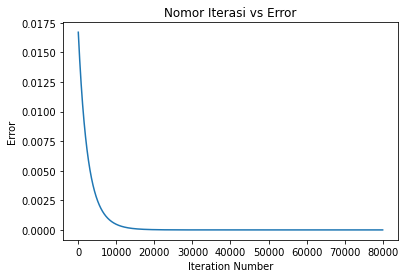

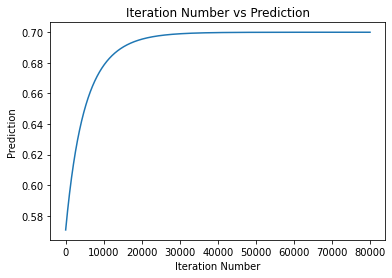

In [90]:
import matplotlib.pyplot
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(network_error)
matplotlib.pyplot.title("Nomor Iterasi vs Error")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Error")

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(predicted_output)
matplotlib.pyplot.title("Iteration Number vs Prediction")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Prediction")

## Kasus 2
### Contoh training.
| No.      | Tidur | Belajar  | Perkiraan % pada Ujian |
|---------|-------|----------|------------------------|
| 1       | 2     | 9        | 92                     |
| 2       | 1     | 5        | 86                     |
| 3       | 3     | 6        | 89                     |


Pada tabel di atas terdapat 3 nilai input dengan 2 fitur dan 1 output.  
Mis. Input no.1, input = [tidur = 2, belajar = 9], output = 92.   

Buatlah jaringan syaraf tiruan dengan konsep **Multi Layer Perceptron** menggunakan model **backpropagation**.

### Langkah pertama adalah menormalisasi input.
Dilakukan dengan cara membagi input dengan nilai terbanyak yang ada diseluruh baris data per kolomnya.
| No | Tidur                  | Belajar                | Perkiraan % dalam Ujian  |
|----|------------------------|------------------------|--------------------------|
| 1  | 2/3 = 0.66666667       | 9/9 = 1                | 0.92                     |
| 2  | 1/3 = 0.33333333       | 5/9 = 0.55555556       | 0.86                     |
| 3  | 3/3 = 1                | 6/9 = 0.66666667       | 0.89                     |



### Langkah kedua: membangun model MLP

In [93]:
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100

In [94]:
#Fungsi sigmoid
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

In [96]:
#Inisialisasi Variabel
epoch=5 #Setting iterasi training 
lr=0.1 #Setting learning rate

In [97]:
# Model Arsitektur MLP
inputlayer_neurons = 2 #jumlah fitur input dalam dataset
hiddenlayer_neurons = 3 #jumlah neuron dari lapisan tersembunyi(hidden layers)
output_neurons = 1 #jumlah neuron di output layer

In [98]:
# Inisialisasi nilai bias dan bobot
# bobot hidden layer (wh)
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
# bias hidden layer (bh)
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
# bobot output layer (wh)
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
# bias output layer (bh)
bout=np.random.uniform(size=(1,output_neurons))

### Langkah ketiga: forward pass dan backward pass

In [109]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [113]:
for i in range(epoch):  # Looping sebanyak epoch yg ditentukan
    # Forward Propagation
    hidden_layer_input = np.dot(X, wh)  # Menghitung net di hidden layer (sigma xw).
    hidden_layer_input_with_bias = hidden_layer_input + bh  # Menambahkan bias hidden layer ke hasil sebelumnya.
    # hinp adalah nilai net dari sigma (X.W)+b
    hidden_layer_activation = sigmoid(hidden_layer_input_with_bias)  # Masukkan ke fungsi aktivasi
    output_layer_input = np.dot(hidden_layer_activation, wout)  # Hitung net di output layer
    output_layer_input_with_bias = output_layer_input + bout  # Menambahkan bias output layer ke hasil sebelumnya.
    # output adalah nilai output prediksi
    output = sigmoid(output_layer_input_with_bias)  # masukkan ke fungsi aktivasi

    # Backpropagation
    error_output = y - output  # Hitung Error
    output_gradient = derivatives_sigmoid(output)  # Hitung turunan parsial dari sigmoid
    delta_output = error_output * output_gradient
    error_hidden = delta_output.dot(wout.T)
    hidden_layer_gradient = derivatives_sigmoid(hidden_layer_activation)
    delta_hidden_layer = error_hidden * hidden_layer_gradient

    wout += hidden_layer_activation.T.dot(delta_output) * lr   # dot product of next layer error and current layer output
    wh += X.T.dot(delta_hidden_layer) * lr

    # Display the error_output value
    print(f"-----------Epoch {i+1} Starts-----------")
    print("Input:\n", X)
    print("Actual Output:\n", y)
    print("Predicted Output:\n", output)
    print("Error Output:\n", error_output)  # Added line to display error_output
    print(f"-----------Epoch {i+1} Ends-----------\n")


-----------Epoch 1 Starts-----------
Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.90051717]
 [0.88858031]
 [0.89922141]]
Error Output:
 [[ 0.01948283]
 [-0.02858031]
 [-0.00922141]]
-----------Epoch 1 Ends-----------

-----------Epoch 2 Starts-----------
Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.90048648]
 [0.88854978]
 [0.89919067]]
Error Output:
 [[ 0.01951352]
 [-0.02854978]
 [-0.00919067]]
-----------Epoch 2 Ends-----------

-----------Epoch 3 Starts-----------
Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output:
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output:
 [[0.90045594]
 [0.8885194 ]
 [0.89916008]]
Error Output:
 [[ 0.01954406]
 [-0.0285194 ]
 [-0.00916008]]
-----------Epoch 3 Ends-----------

-----------Epoch 4 Starts-----------


In [112]:
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.900548  ]
 [0.88861097]
 [0.89925229]]
